# Tuto LOQCathon 

In this tutorial, we will try to cover any basic code to get our hands on Perceval.
The full documentation can be found on [Doc Perceval](https://perceval.quandela.net/).

For any question, feel free to ask !




[I. Introduction](#introduction)\
[II. Linear Optical Circuits](#circuits)\
[III. Simulation](#simulation)\
[IV. Encoding Qubits](#encoding)\
[V. To Go Further](#further)






# I. Introduction <a class="anchor" id="introduction"></a>

### Installation <a name="installation"></a>

In [1]:
import perceval as pcvl
pcvl.__version__

'0.6.1.post87'

In [2]:
from perceval.components.unitary_components import PS, BS, PERM 
import numpy as np

## Use the symbolic skin for display
from perceval.rendering.circuit import DisplayConfig, SymbSkin
DisplayConfig.select_skin(SymbSkin)

### BasicStates <a name="basicstates"></a>

In Linear Optical Circuits, photons can have many discrete degrees of freedom, called modes. 
It can be the frequency, the polarisation, the position, or all of them.

We represent these degrees of freedom with Fock states. If we have $n$ photons over $m$ modes, the Fock state $|s_1,s_2,...,s_m\rangle$ means we have $s_i$ photons in the $i^{th}$ mode. Note that $\sum_{i=1}^m s_i =n$.

In Perceval, we will use the module `pcvl.BasicState`

In [3]:
## Syntax of different BasicState (list, string, etc)
bs1 = pcvl.BasicState('|0,2,0,1>')
bs2 = pcvl.BasicState([0, 2, 0, 1])

if bs1==bs2:print("Those are the same states")

## You can iterate on modes
for i, photon_count in enumerate(bs2):
    print(f"There is {photon_count} photon in mode {i}")



Those are the same states
There is 0 photon in mode 0
There is 2 photon in mode 1
There is 0 photon in mode 2
There is 1 photon in mode 3


### LO-Components <a name="components"></a>

The linear optical components are the elementary blocks which will act on our Fock states.

It's important to know all the possible components that can be found in Perceval and understand their effects.



PERM
PERM([2, 0, 1])


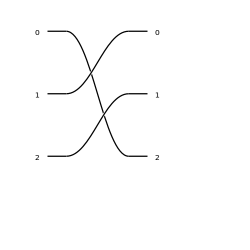

In [4]:
## Permutation

perm=PERM([2,0,1])

print(perm.name)
print(perm.describe())
pcvl.pdisplay(perm.definition())
pcvl.pdisplay(perm)

PS
PS(phi=pi)


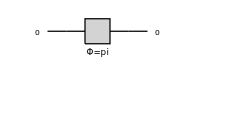

In [5]:
## Phase shifter
ps = PS(phi=np.pi)

print(ps.name)
print(ps.describe())  
pcvl.pdisplay(ps.definition()) 
pcvl.pdisplay(ps)  # A pdisplay call on a circuit/processor needs to be the last line of a cell


BS.Rx() unitary matrix


BS.H() unitary matrix


BS.Ry() unitary matrix


BS displays its convention as a small label


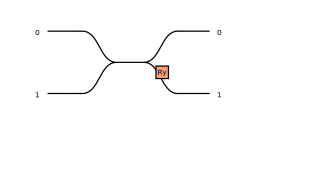

In [6]:
## Beam splitters

bs_rx = BS.Rx()  # By default a beam splitter follows the Rx gate convention, so bs=BS() has the same matrix

# But other conventions exist too:
bs_h = BS.H() 
bs_ry = BS.Ry()

## Check the difference in the unitary definition:
print("BS.Rx() unitary matrix")
pcvl.pdisplay(bs_rx.definition())
print("BS.H() unitary matrix")
pcvl.pdisplay(bs_h.definition())
print("BS.Ry() unitary matrix")
pcvl.pdisplay(bs_ry.definition())
print("BS displays its convention as a small label")
pcvl.pdisplay(bs_ry)

In [86]:
# You can ask for the symbolic matrix value of your component with the attribute U
my_ps = PS(phi=np.pi/8)
pcvl.pdisplay(my_ps.U)
# And for the numerical value with the method compute_unitary
pcvl.pdisplay(my_ps.compute_unitary())
print("")

# If you do it for a Beam-Splitter, you can see that by default theta=pi/2, and the phi's are 0
print("A default beam-splitter:")
pcvl.pdisplay(BS().compute_unitary())
print("")

# To control the value of the parameters of a component, several choices are possible: 
#  - by setting a numerical value during the creation of the component
print("A Beam-Splitter with a numerical value for theta:")
bs_rx = BS.Rx(theta=10)
pcvl.pdisplay(bs_rx.U)
pcvl.pdisplay(bs_rx.compute_unitary())
print("")

#  - by using the syntax pcvl.P to create a symbolic variable 
#    (note that you cannot compute the numerical value of your component anymore)
print("A Phase Shifter with a symbolic value for phi:")
ps = PS(phi=pcvl.P('\psi'))
pcvl.pdisplay(ps.U)
print("")

#  - you can still modify the value of a symbolic variable after its creation
#    This is not true for a numerical variable!
print("A beam-splitter with a symbolic variable...")
bs_rx = BS(theta=pcvl.P('toto'))
pcvl.pdisplay(bs_rx.U)
bs_rx.assign({'toto':5})
bs_rx.assign({'toto':10})
print("... set to a numerical value")
pcvl.pdisplay(bs_rx.compute_unitary())
print("")

# To check which parameters can be modified, you can call the method get_parameters
# You can also directly change the output of get_parameters to change the values of the parameters
bs_rx = BS(theta=pcvl.P('toto'), phi_tl = pcvl.P('tata'), phi_tr = -1)
parameters = bs_rx.get_parameters()
parameters[0].set_value(np.pi)
print("Modified parameters...")
for param in parameters:
    print("    ", param)
print("... and successfully modified Beam-Splitter:")
pcvl.pdisplay(bs_rx.U)


A default beam-splitter:



A Beam-Splitter with a numerical value for theta:



A Phase Shifter with a symbolic value for phi:



A beam-splitter with a symbolic variable...


... set to a numerical value



Modified parameters...
     Parameter(name='toto', value=3.141592653589793, min_v=0.0, max_v=12.566370614359172)
     Parameter(name='tata', value=None, min_v=0.0, max_v=6.283185307179586)
... and successfully modified Beam-Splitter:


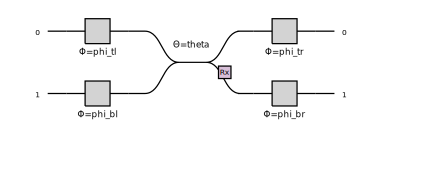

In [82]:
## to understand the conventions, you can note that a BS.Rx with the 4 phases phi (top left/right and bottom left/right) can be represented like that 

bs_rx_circuit=pcvl.Circuit(2) // (0,PS(phi=pcvl.P("phi_tl"))) // (1,PS(phi=pcvl.P("phi_bl"))) // BS(theta=pcvl.P('theta')) // (0,PS(phi=pcvl.P("phi_tr"))) // (1,PS(phi=pcvl.P("phi_br")))


pcvl.pdisplay(bs_rx_circuit.U)

# we can check it's the same as bs_rx.definition()
pcvl.pdisplay(bs_rx_circuit)

## For this cell, we needed the syntax to builds circuits... Good transition !

# II. LO-Circuits <a class="anchor" id="circuits"></a>

From the LO-components, we can build a LO-circuit, i.e. a sequence of those components acting on our different modes.

### Syntax

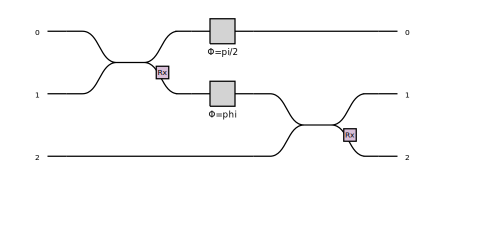

In [87]:
circuit = pcvl.Circuit(3)  # Create a 3 mode circuit


circuit.add(0, BS())
circuit.add(0, PS(phi=np.pi/2)).add(1, PS(phi=pcvl.P('phi'))).add(1, BS())

# Equivalent syntax:
# circuit // BS() // PS(phi=np.pi/2) // (1, PS(phi=pcvl.P('phi'))) // (1, BS())

 
pcvl.pdisplay(circuit.U)
pcvl.pdisplay(circuit)

The syntax ``pcvl.P('phi')`` allows you to use parameters in the circuit, where you can assign a value or not. The behavior of the parameters of a circuit is similar to the case of the components.

For instance, you can use :

[Parameter(name='phi', value=None, min_v=0.0, max_v=6.283185307179586)]


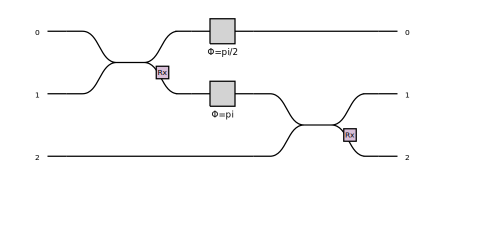

In [88]:
params=circuit.get_parameters()
print(params) #list of the parameters

# the value is None, but we can change that with :

params[0].set_value(np.pi)
pcvl.pdisplay(circuit)


### Mach-Zehnder Interferometers 

The beamsplitter's angle $\theta$ can also be defined as a parameter.

However, as the reflexivity depends on the mirror, it's hard to have adaptibility on the angle. 
Therefore, in practice, we use a [Mach-Zehnder Interferometer](https://en.wikipedia.org/wiki/Mach%E2%80%93Zehnder_interferometer). 

The beamsplitter with a parameterised $\theta$ is therefore implemented with a parameterised phase shifter $\phi$ between two fixed beamsplitters.




![](mzi.svg "Mach-Zehnder Intereforemeter")

In [89]:
## TO-DO: build a circuit implementing the mzi



## TO-DO: Check that the parameterised phase allows you to change the reflexivity of your MZI



## Note: If you need to create a BS directly from the reflexivity value, please use:
## BS(BS.r_to_theta(reflectivity_value))
## However, be aware that only theta value is stored inside the BS object

### Universal Circuits

An operation on the modes of our circuit can also be expressed as a unitary.

For three modes, the unitary $U=\begin{pmatrix}
a_{1,1} & a_{1,2} & a_{1,3}\\
a_{2,1} & a_{2,2} & a_{2,3} \\ 
a_{3,1} & a_{3,2} & a_{3,3}
\end{pmatrix}$ performs the following operation on the Fock state basis:

$$\begin{array}{rcl}
|1,0,0\rangle &  \mapsto&  a_{1,1}|1,0,0\rangle + a_{1,2}|0,1,0\rangle + a_{1,3}|0,0,1\rangle\\
|0,1,0\rangle &  \mapsto&  a_{2,1}|1,0,0\rangle + a_{2,2}|0,1,0\rangle + a_{2,3}|0,0,1\rangle\\
|0,0,1\rangle &  \mapsto&  a_{3,1}|1,0,0\rangle + a_{3,2}|0,1,0\rangle + a_{3,3}|0,0,1\rangle
\end{array}$$

Since 1994, we know that any $U$ on the modes can be implemented as an LO-circuit [Reck's et al](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.73.58).

This decomposition can be done easily in Perceval using beamsplitters and phase-shifters as follows. 

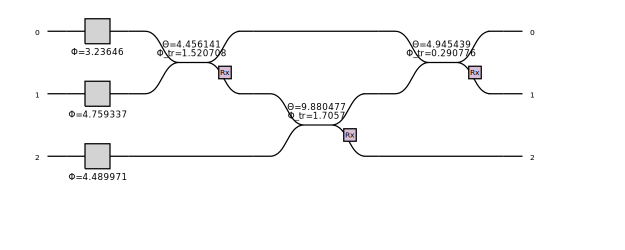

In [97]:
## From any unitary
n=3
U=pcvl.Matrix.random_unitary(n)

circuit_u=pcvl.Circuit.decomposition(U,BS(theta=pcvl.P('theta'),phi_tr=pcvl.P('phi')),phase_shifter_fn=PS)

pcvl.pdisplay(circuit_u)




In [98]:
print("The error between the two unitaries is",np.linalg.norm(U-circuit_u.compute_unitary()))

The error between the two unitaries is 7.664002536590977e-09


In [99]:
## TO-DO: decompose your unitary with only phase shifters and balanced beamsplitters.



## Note: you can use a MZI. Be careful to put the phase on the right, as the full layer of phase_shifter_fn is on the left of the circuit


In [100]:
## TO-DO: check the norm of the difference to be sure it has worked well 

### Black Box 

To improve readibility, the circuit can be constructed in multiple steps which are then combined as black boxes. This will also help when we'll need generic operations (see [Encoding]()).


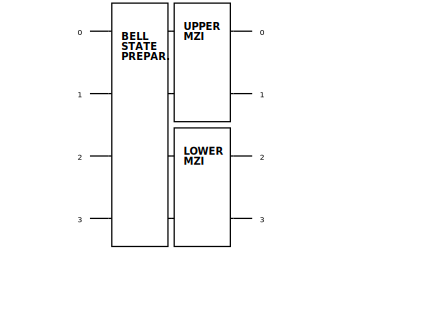

In [101]:
pre_MZI = (pcvl.Circuit(4, name="Bell State Prepar.")
           .add(0, BS())
           .add(2, BS())
           .add(1, PERM([1, 0])))

upper_MZI = (pcvl.Circuit(2, name="upper MZI")
             .add(0, PS(phi=pcvl.P('phi_0')))
             .add(0, BS())
             .add(0, PS(phi=pcvl.P('phi_2')))
             .add(0, BS()))

lower_MZI = (pcvl.Circuit(2, name="lower MZI")
             .add(0, PS(phi=pcvl.P('phi_1')))
             .add(0, BS())
             .add(0, PS(phi=pcvl.P('phi_3')))
             .add(0, BS()))

chip = (pcvl.Circuit(4)
              .add(0, pre_MZI)
              .add(0, upper_MZI, merge=False)
              .add(2, lower_MZI, merge=False))

pcvl.pdisplay(chip)

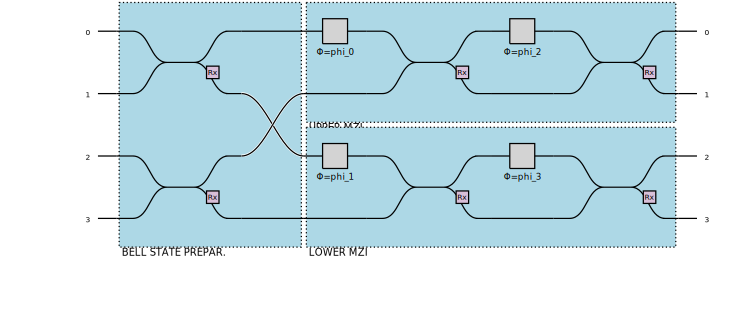

In [102]:
## You can still display the inside of black boxes with:
pcvl.pdisplay(chip, recursive=True)

# III. Simulation <a name="simulation"></a>

Up to this point, we have focused on creating circuits.
It's time to learn how to sample from them or describe their output distribution, on many different inputs.



### Computing probabilities 

For this part, we will take the [Hong-Ou-Mandel](https://en.wikipedia.org/wiki/Hong%E2%80%93Ou%E2%80%93Mandel_effect) experience as an example.

It's one of the simplest experiments and yet it is very useful.

Making two indistinguishable photons, one in each mode, enter one balanced beamsplitter $BS=\frac{1}{\sqrt{2}} \left[\begin{matrix}1 & 1\\1& -1\end{matrix}\right]$, we expect the outcome to be:

$$|1,1\rangle \mapsto \frac{|2,0\rangle - |0,2\rangle}{\sqrt{2}}  $$

We will show how to verify this in the next steps using the Naive backend to recover the full probability distribution.

In [ ]:
## TO-DO: build the circuit with the convention above

circuit= ...



In [ ]:
# Syntax to compute the amplitudes
backend = pcvl.BackendFactory.get_backend("Naive") 

simulator = backend(circuit)
print(simulator.probampli(pcvl.BasicState([1,1]), pcvl.BasicState([2,0])))  #note that it's the amplitude ! 
print(simulator.probampli(pcvl.BasicState([1,1]), pcvl.BasicState([0,2])))
print(simulator.prob(pcvl.BasicState([1,1]), pcvl.BasicState([0,2])))



## We can also use the Analyser module to have a table of probabilities 
p = pcvl.Processor("Naive", BS())
analyzer = pcvl.algorithm.Analyzer(p, [pcvl.BasicState([1,1])], '*')
pcvl.pdisplay(analyzer)


0.7071067811865475j
0.7071067811865475j
0.4999999999999999


,"|1,1>","|2,0>","|0,2>"
"|1,1>",0,1/2,1/2


In [47]:
## TO-DO:  Choose a random unitary 3x3 U, and output the table probablities when the input |1,1,0> passes through the LO-Circuit of unitary U.




### Sampling 

Although it's crucial to compute the output distribution, it's not what we can expect from a photonic chip. Indeed, realistically, we only can obtain a single sample from the distribution each time we run the circuit. This can be done using the backend SLOS.



In [45]:
p = pcvl.Processor("SLOS", BS())
p.with_input(pcvl.BasicState([1,1]))
#p.set_postprocess()
p.mode_post_selection(1)  # We accept that two photons get on the same mode (by default, these states are discarded)
# The sampler holds 'probs', 'sample_count' and 'samples' calls. You can use the one that fits your needs!

sampler = pcvl.algorithm.Sampler(p)  

sample_count = sampler.sample_count(1000)
print(sample_count['results'])


{
  |2,0>: 501
  |0,2>: 499
}


In [49]:
## TO-DO: implement the code to sample from the 3x3 Unitary of earlier




## Question: how many states do we have for 3 modes and 2 photons?

## Question : how many states do we have for m modes and n photons? 

## Question: how many samples are needed to approximate the distribution?

### Variational algorithm 

In variational algorithms, the samples from a quantum circuit allow us to approximate an expectation value, which is then used to determine the value of a loss function. This loss function is chosen such that minimising it yields a solution to a given problem. By changing the values of the parameters in our quantum circuit, we can search for this minimum.

We won't go into the details of variational algorithms. However, it may be useful to see how to perform an optimisation with Perceval.

We will use the library [scipy.optimise](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).

The following code solves the problem of finding an LO-Circuit which, given a Fock State $|1,1,1\rangle$, maximises the probability of outputting $|3,0,0\rangle$.
The solution below works for an arbitrary $n$.

In [71]:
from scipy import optimize


## Data

n=3
input=pcvl.BasicState([1]*n)
output_to_max=pcvl.BasicState([n]+[0]*(n-1))


## TO-DO: implement a generic circuit of size n with parameters. Code the loss function to maximise the good output. Launch the optimisation procedure. Output the probability and circuit obtained

circuit=None

def loss_function(params):
    return None


params_init=[0]*(n**2)

#o=optimize.minimize(loss_function,params_init,method="Powell")
#finale_params=o.X


Question:  what is therefore the maximal probability ?

### To go further : connect to a chip

Perceval is also connected to real/physical chips.
Here's the syntax to sample directly from them ! 

[Link for other notebook]()

# Encoding Qubits <a name="encoding"></a>

### Path encoding

To perform quantum computations using photons, we need an encoding: a correspondance between our Fock states and our qubit states.

We therefore want to associate each qubit state with one of our Fock states.

One natural way to encode qubits is the path encoding.
A qubit is a two-level quantum state, so we will use two spatial modes to encode it.

The logical qubit state $|0\rangle_L$ will correspond to a photon in the upper mode, so the Fock state $|1,0\rangle$, while $|1\rangle_L$ will be encoded as $|0,1\rangle$.


We can extend this to multiple qubits by having twice as many modes as there are qubits. For example the $3$-qubit state $\frac{1}{\sqrt{2}}(|000\rangle_L+|111\rangle_L)$ can be encoded with $3$ photons and $3\times 2=6$ modes :
$\frac{1}{\sqrt{2}}(|1,0,1,0,1,0\rangle+|0,1,0,1,0,1\rangle)$

### Single-qubit gates

Using the dual-rail enconding, single-qubit gates only deal with one photon and are straightforward. Can you give the LO-circuits for the gates below?

$$X=\left[\begin{matrix}0 & 1\\1& 0\end{matrix}\right]$$
$$Y=\left[\begin{matrix}0 & -i\\i& 0\end{matrix}\right]$$
$$Z=\left[\begin{matrix}1 & 0\\0& -1\end{matrix}\right]$$
$$H=\frac{1}{\sqrt{2}} \left[\begin{matrix}1 & 1\\1& -1\end{matrix}\right]$$

$$R_X=\left[\begin{matrix}\cos{\left(\frac{\theta}{2} \right)} & -i \sin{\left(\frac{\theta}{2} \right)}\\-i \sin{\left(\frac{\theta}{2} \right)} & \cos{\left(\frac{\theta}{2} \right)}\end{matrix}\right]$$

$$R_Y=\left[\begin{matrix}\cos{\left(\frac{\theta}{2} \right)} & - \sin{\left(\frac{\theta}{2} \right)}\\ \sin{\left(\frac{\theta}{2} \right)} & \cos{\left(\frac{\theta}{2} \right)}\end{matrix}\right]$$

$$R_Z=\left[\begin{matrix}e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}}\end{matrix}\right]$$

In [46]:
## TO-DO: find the LO-circuits for each gate

### Two-qubit gates

On the other hand, in dual-rail encoding, it can be shown that two-qubit gates can't be deterministic, and have a probability to fail.

There are two ways to detect that failure:

- We can use additional photons called ancillas, which we can measure independently from the main circuit photons. Depending on the state obtained on the ancilla, we know whether the gate has succeeded or not on the main qubits. Those gates will be called heralded.
- We can also directly measure the main circuit qubits, and depending on the result, assess whether the gate has succeeded or not. Those gates will be called postselected.

The CNOT gate acts on two qubits, a control and a target, and flips the value of the target if the control qubit is in state $|1\rangle_L$. In the following two exercices, we will see the two types of CNOT gates: 
- the postselected CNOT of [Ralph et al.](https://arxiv.org/abs/quant-ph/0112088)
- the heralded CNOT of the [KLM protocol](https://arxiv.org/abs/quant-ph/0006088)

In [39]:
## We introduce the component catalog. It contains both CNOT gates.
from perceval.components import catalog
print(catalog.list())


['heralded cnot', 'postprocessed cnot', 'generic 2 mode circuit']


POSTPROCESSED CNOT DOCUMENTATION
---------------------------------

CNOT gate with 2 heralded modes and a post-processing function

Scientific article reference: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.65.062324

Schema:
                      ╭─────╮
data (dual rail) ─────┤     ├───── data (dual rail)
                 ─────┤     ├─────
                      │     │
ctrl (dual rail) ─────┤     ├───── ctrl (dual rail)
                 ─────┤     ├─────
                      ╰─────╯

2


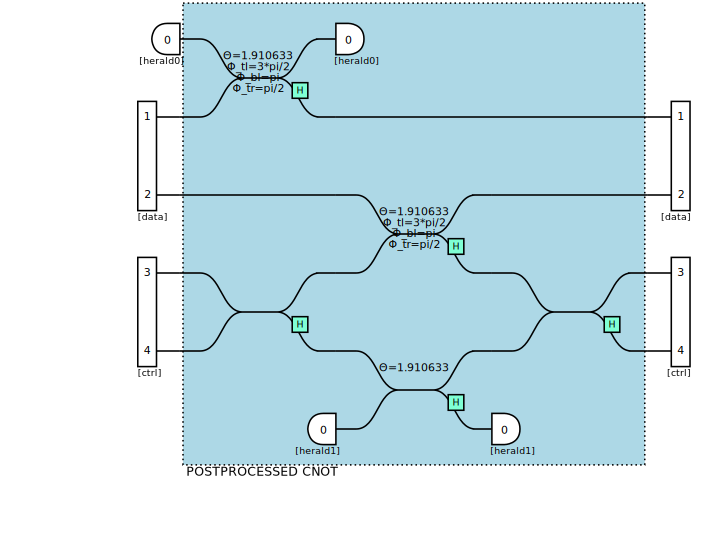

In [42]:
## Ralph's et al. CNot

print(catalog['postprocessed cnot'].doc)
ralph_cnot = catalog['postprocessed cnot'].as_processor().build()
## You can set its input state with a LogicalState
ralph_cnot.with_input(pcvl.BasicState([0, 1, 1, 0]))

print(ralph_cnot._min_mode_post_select)

pcvl.pdisplay(ralph_cnot, recursive=True, render_size=1.25)

In [41]:
## You can sample some output states
cnot_sampler = pcvl.algorithm.Sampler(ralph_cnot)
samples = cnot_sampler.probs()
print(samples['results'])
print("Some output states were not selected because of heralds and post-processing => you can check the logical performance")
print("Logical performance = ", samples['logical_perf'])

## You can use a non-perfect photon source too:
print("With an imperfect source:")
p_imperfect_source = pcvl.Processor("SLOS", 4, source=pcvl.Source(brightness=0.3))
p_imperfect_source.add(0, catalog['postprocessed cnot'].as_processor().build())
p_imperfect_source.with_input(pcvl.BasicState([1, 0, 1, 0]))
cnot_sampler_imperfect_source = pcvl.algorithm.Sampler(p_imperfect_source)
samples_imperfect_source = cnot_sampler_imperfect_source.samples(10)

print(samples_imperfect_source['results'])
print("Here logical performance has not changed, however, the physical performance has dropped:")
print("Logical performance (imperfect source) =", samples_imperfect_source['logical_perf'])
print("Physical performance (imperfect source) =", samples_imperfect_source['physical_perf'])
print("vs (perfect source) =", samples['physical_perf'])

{
  |0,1,0,1>: 1
}
Some output states were not selected because of heralds and post-processing => you can check the logical performance
Logical performance =  0.19999999999999996
With an imperfect source:
[|1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>]
Here logical performance has not changed, however, the physical performance has dropped:
Logical performance (imperfect source) = 0.11111111111111105
Physical performance (imperfect source) = 0.09000000000000005
vs (perfect source) = 0.5555555555555554


In [67]:
## TO-DO: Check/Convince yourself that the circuit above is performing a CNOT in the dual rail encoding

HERALDED CNOT DOCUMENTATION
----------------------------

CNOT gate with 4 heralded modes

Scientific article reference: https://doi.org/10.1073/pnas.1018839108

Schema:
                      ╭─────╮
data (dual rail) ─────┤     ├───── data (dual rail)
                 ─────┤     ├─────
                      │     │
ctrl (dual rail) ─────┤     ├───── ctrl (dual rail)
                 ─────┤     ├─────
                      ╰─────╯



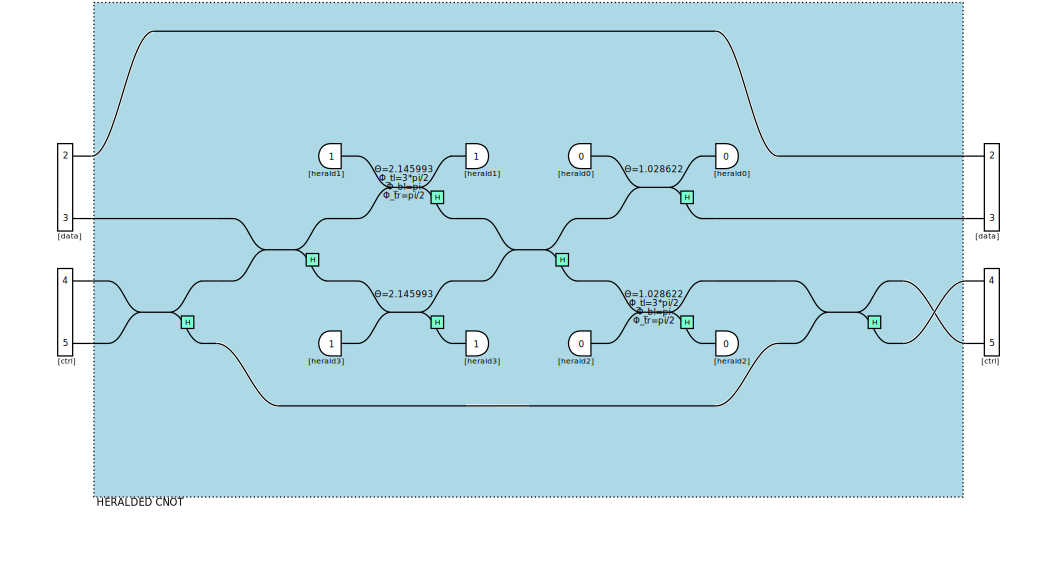

In [47]:
## KLM's CNOT

print(catalog['heralded cnot'].doc)
knill_cnot = catalog['heralded cnot'].as_processor().build()

pcvl.pdisplay(knill_cnot, recursive=True)


In [77]:
## You can sample some output states
cnot_sampler = pcvl.algorithm.Sampler(knill_cnot)
knill_cnot.with_input(pcvl.LogicalState([0, 0]))

samples = cnot_sampler.samples(10)
print(samples['results'])
print("Some output states were not selected because of heralds and post-processing => you can check the logical performance")
print("Logical performance = ", samples['logical_perf'])

## You can use a non-perfect photon source too:
print("With an imperfect source:")
p_imperfect_source = pcvl.Processor("SLOS", 4, source=pcvl.Source(brightness=0.3))
p_imperfect_source.add(0, catalog['postprocessed cnot'].as_processor().build())
p_imperfect_source.with_input(pcvl.BasicState([1, 1, 1, 0]))
cnot_sampler_imperfect_source = pcvl.algorithm.Sampler(p_imperfect_source)
samples_imperfect_source = cnot_sampler_imperfect_source.samples(10)
print(samples_imperfect_source['results'])
print("Here logical performance has not changed, however, the physical performance has dropped:")
print("Logical performance (imperfect source) =", samples_imperfect_source['logical_perf'])
print("Physical performance (imperfect source) =", samples_imperfect_source['physical_perf'])
print("vs (perfect source) =", samples['physical_perf'])

[|1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>, |1,0,1,0>]
Some output states were not selected because of heralds and post-processing => you can check the logical performance
Logical performance =  0.15517986547460838
With an imperfect source:
[|1,0,1,1>, |1,0,1,1>, |1,1,0,1>, |1,1,0,1>, |1,0,1,1>, |1,0,1,1>, |1,1,0,1>, |1,0,1,1>, |1,0,1,1>, |1,1,0,1>]
Here logical performance has not changed, however, the physical performance has dropped:
Logical performance (imperfect source) = 0.1333333333333333
Physical performance (imperfect source) = 0.014999999999999993
vs (perfect source) = 0.3322880933959652


In [56]:
## TO-DO: Check it perfoms a CNOT, and explicit the difference between the two types of CNOT

### Exercise

The next circuit comes from the following [paper](https://quantum-journal.org/papers/q-2021-03-29-422/).

![](QCircuit_ex.PNG "Quantum Circuit")

In [ ]:
# TO-DO : reproduce it in the encoding seen above

# To go further  <a name="further"></a>

### Noise

For now, we've only dealt with perfect circuits, with perfect photons/sources/detectors.

A realistic chip is of course far from being perfect. This section aims to show you how to model some realistic noises we can encounter.


### Exercise


In [3]:
## TO-DO : model HOM, g2, errors of detection 